# Predicting galaxy redshift from band magnitudes with random forest

Zooey Nguyen

2021-07-08


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from photoz_utils import *

## Setup

In [2]:
df = import_photoz_data()
df = clean_photoz_data(df)
X_train, X_test, y_train, y_test = split_photoz_data(df)

               g_mag          r_mag          i_mag          z_mag  \
count  120087.000000  120087.000000  120087.000000  120087.000000   
mean       23.125958      22.295162      21.658525      21.314297   
std         1.315028       1.270731       1.267032       1.276612   
min        16.207699      15.334381      14.787071      14.448893   
25%        22.442802      21.681322      21.074194      20.715300   
50%        23.227943      22.461906      21.819270      21.457150   
75%        23.969581      23.080850      22.353845      22.002482   
max        25.999767      26.860947      27.057146      27.920784   

               y_mag          zspec  
count  120087.000000  120087.000000  
mean       21.135538       0.836557  
std         1.294271       0.530408  
min        14.223459       0.010250  
25%        20.510621       0.546725  
50%        21.279144       0.742620  
75%        21.844333       0.975000  
max        34.435986       3.996137  


## Train random forest regressor

In [3]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 200)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

## Evaluate training point and density estimates

In [4]:
y_train_pred = rf_model.predict(X_train)
predictions = []
for i in range (len(rf_model.estimators_)):
    predictions.append(np.array(rf_model.estimators_[i].predict(X_train)))    
y_train_densities = np.asarray(predictions).T

R squared: 0.9387230056603011
Mean squared error: 0.017261638120141302
Bias: 0.013196691882113299
Conventional dispersion: 0.023020599155195526


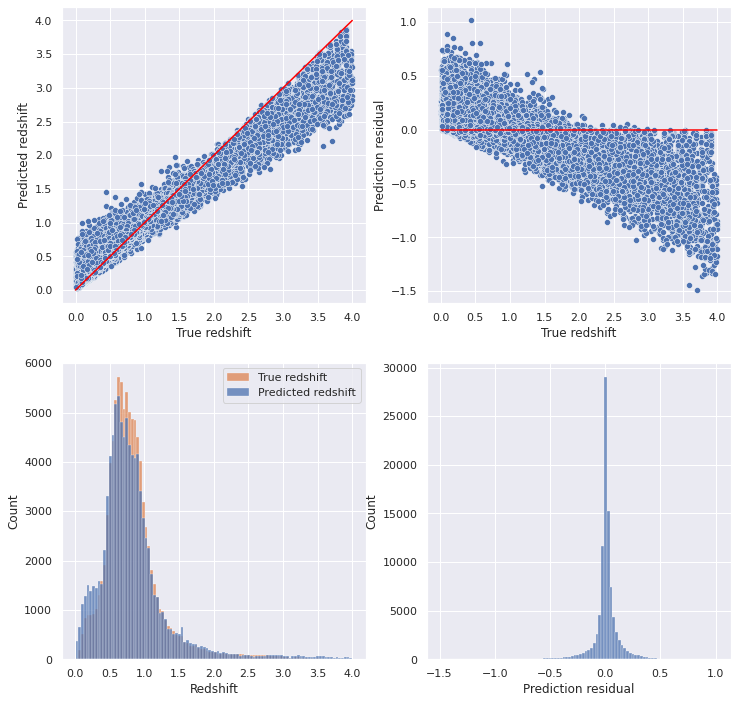

In [5]:
evaluate_point_estimates(y_train, y_train_pred)

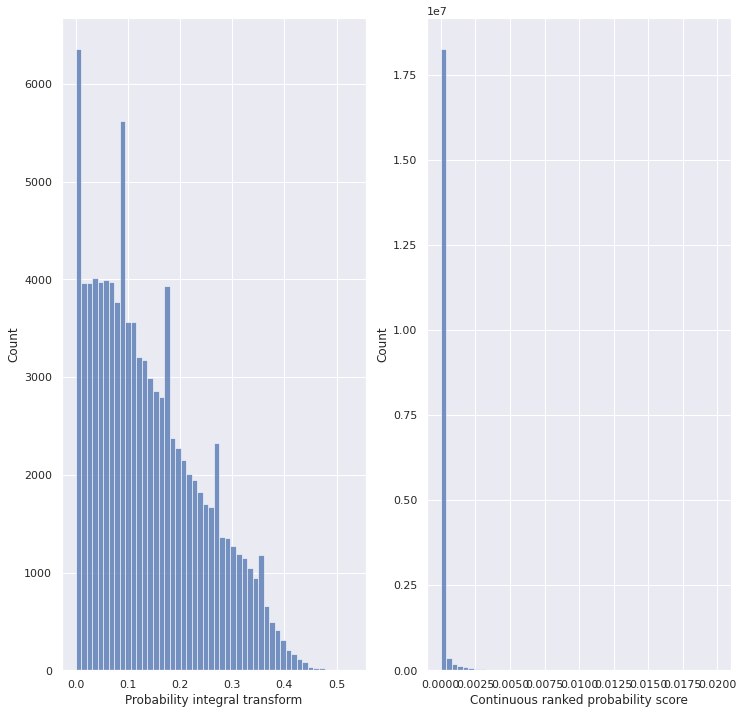

In [6]:
evaluate_density_estimates(y_train, y_train_densities)